In [ ]:
!pip install yfinance
#https://github.com/ranaroussi/yfinance
#https://finance.yahoo.com/

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=c2578a60e767701d09a95b9bccb8215cd8487dc736e740bd841dfb87f11d91c6
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import yfinance as yf
import numpy as np
import sys
from scipy import linalg
from pylab import *
import pandas as pd
import matplotlib
from pandas_datareader import data as pdr
pd.options.display.max_columns = None

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:

Choose_Stock = input("Enter the Stock Code to be analysed \n(Code must be the same as showed on Yahoo Finance !): ")

Stock = yf.Ticker(Choose_Stock)
IBOV = yf.Ticker("^BVSP")
VIX = yf.Ticker("^VIX")
DOL = yf.Ticker("BRL=X")

yf.pdr_override()

dfStock = Stock.history(period="max")
string1 = "_" + Choose_Stock
#dfStock

dfIBOV = IBOV.history(period="max")
string2 = "_IBOV"
#dfIBOV

dfVIX = VIX.history(period="max")
string3 = "_VIX"
#dfVIX

dfDOL = DOL.history(period="max")
string4 = "_DOL"
#dfDOL

def mergedataframes(df1 , df2, stringdf1 = None, stringdf2 = None):
  dfmerged = pd.merge(df1, df2, on="Date",suffixes = (stringdf1,stringdf2))
  return dfmerged

df3 = mergedataframes(dfStock, dfIBOV,string1,string2)
df4 = mergedataframes(df3, dfVIX)
df5 = mergedataframes(df4, dfDOL,string3,string4)
df5 = df5.loc[df5.index > "2018-01-01"]
df5

Enter the Stock Code to be analysed 
(Code must be the same as showed on Yahoo Finance !): LAME4.SA


,Open_LAME4.SA,High_LAME4.SA,Low_LAME4.SA,Close_LAME4.SA,Volume_LAME4.SA,Dividends_LAME4.SA,Stock Splits_LAME4.SA,Open_IBOV,High_IBOV,Low_IBOV,Close_IBOV,Volume_IBOV,Dividends_IBOV,Stock Splits_IBOV,Open_VIX,High_VIX,Low_VIX,Close_VIX,Volume_VIX,Dividends_VIX,Stock Splits_VIX,Open_DOL,High_DOL,Low_DOL,Close_DOL,Volume_DOL,Dividends_DOL,Stock Splits_DOL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,16.48,16.55,15.89,16.17,18008751,0.000000,0.0,76403.0,77909.0,76403.0,77891.0,2880300,0,0,10.95,11.07,9.52,9.77,0,0,0,3.3108,3.3127,3.2585,3.3110,0,0,0
2018-01-03,16.12,16.29,15.97,16.02,6067303,0.000000,0.0,77889.0,78414.0,77602.0,77995.0,3142200,0,0,9.56,9.65,8.94,9.15,0,0,0,3.2574,3.2638,3.2410,3.2578,0,0,0
2018-01-04,16.07,16.10,15.74,15.79,8098635,0.000000,0.0,77998.0,79135.0,77998.0,78647.0,3486100,0,0,9.01,9.31,8.92,9.22,0,0,0,3.2356,3.2410,3.2214,3.2355,0,0,0
2018-01-05,15.86,15.90,15.58,15.90,5002068,0.074971,0.0,78644.0,79071.0,78218.0,79071.0,2747100,0,0,9.10,9.54,9.00,9.22,0,0,0,3.2328,3.2479,3.2256,3.2331,0,0,0
2018-01-08,15.97,16.18,15.97,16.18,4842223,0.000000,0.0,79070.0,79395.0,78631.0,79379.0,2550800,0,0,9.61,9.89,9.32,9.52,0,0,0,3.2281,3.2435,3.2235,3.2266,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,34.31,34.52,32.76,33.98,11351500,0.000000,0.0,102776.0,103722.0,101282.0,103444.0,8259500,0,0,22.88,23.52,21.46,22.13,0,0,0,5.4371,5.4382,5.3474,5.4372,0,0,0
2020-08-11,34.36,35.15,34.08,34.67,13516300,0.000000,0.0,103449.0,104409.0,102174.0,102174.0,9360900,0,0,21.85,24.93,20.28,24.03,0,0,0,5.4800,5.4837,5.3991,5.4805,0,0,0
2020-08-12,35.00,35.14,34.13,35.14,15154600,0.000000,0.0,102176.0,103116.0,100698.0,102118.0,10114200,0,0,22.82,22.88,21.54,22.28,0,0,0,5.3803,5.4833,5.3774,5.3804,0,0,0


In [ ]:
df5.to_csv("IBOV_CONGN_VIX.csv",sep=';', encoding= "utf-8")

Text(0.5, 0, 'Anos')

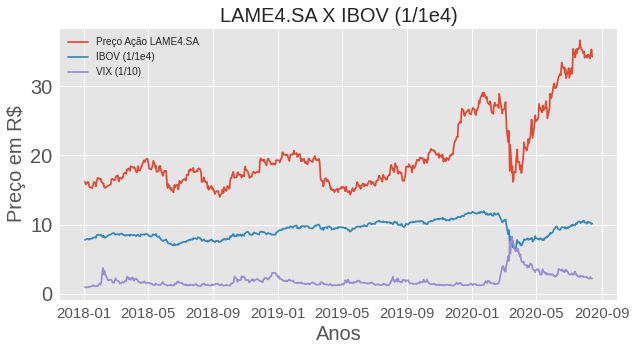

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 17,'xtick.labelsize': 15,'ytick.labelsize':20,'axes.titlesize':20,'axes.labelsize':20})
matplotlib.pyplot.plot(df5.index,df5["Close_" + Choose_Stock], label = "Preço Ação " + Choose_Stock)
matplotlib.pyplot.plot(df5.index,df5["Close_IBOV"]/1e4, label = "IBOV (1/1e4)")
matplotlib.pyplot.plot(df5.index,df5["Close_VIX"]/10, label = "VIX (1/10)")
matplotlib.pyplot.ylabel("Preço em R$")
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title(Choose_Stock + " X IBOV (1/1e4)")
matplotlib.pyplot.xlabel("Anos")

Text(0.5, 1.0, 'IBOV - Dolarizado')

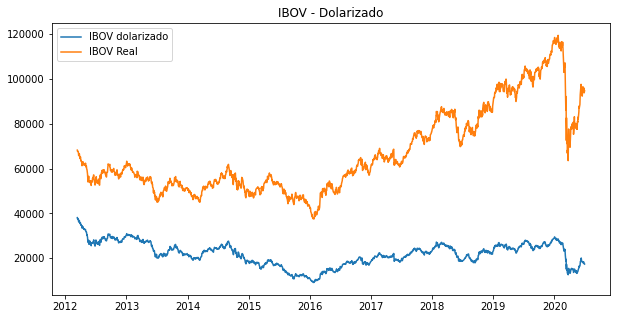

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
matplotlib.pyplot.plot(df5.index,df5["Close_IBOV"]/df5["Close_DOL"], label = "IBOV dolarizado")
matplotlib.pyplot.plot(df5.index,df5["Close_IBOV"], label = "IBOV Real")
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title("IBOV - Dolarizado")

[38104.72840953 37567.37274038 37614.76047571 ... 17952.15651068
 17507.97649034 17353.75739482]
[-54.26, -45.66, -554.05, -378.63, -426.34, -491.94, -81.33, -614.09, -148.23, -345.48, -480.31, -535.3, -322.69, -191.88, -4.28, -90.59, -121.5, -335.1, -100.35, -488.81, -250.68, -413.38, -162.57, -421.44, -39.77, -144.0, -57.1, -530.95, -19.85, -83.22, -106.94, -79.77, -30.84, -36.72, -506.22, -169.5, -58.42, -232.98, -223.35, -33.2, -78.31, -219.73, -308.28, -77.02, -72.38, -193.01, -528.31, -6.14, -17.86, -34.47, -33.52, -79.88, -165.1, -205.96, -150.26, -101.66, -550.55, -359.41, -370.54, -277.63, -357.38, -89.59, -499.48, -390.36, -376.23, -67.46, -7.24, -84.2, -62.13, -222.56, -485.96, -248.5, -410.83, -152.65, -105.47, -322.84, -236.13, -14.13, -441.37, -266.04, -104.44, -101.42, -208.0, -153.38, -125.71, -165.27, -16.31, -263.5, -524.38, -214.77, -186.55, -554.13, -266.61, -171.62, -442.35, -19.85, -268.94, -201.29, -451.41, -687.6, -796.32, -136.38, -513.74, -253.46, -930.6, -409

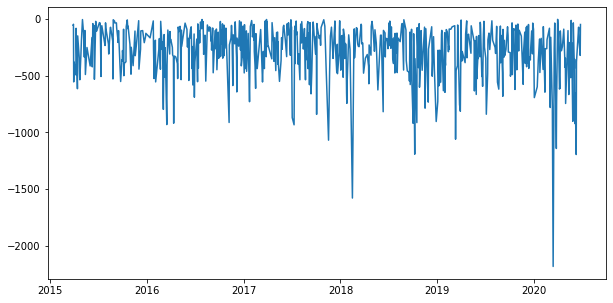

In [ ]:
ibovdolar = []
maioresquedas = []
indices = []

ibovdolar = (df5["Close_IBOV"]/df5["Close_DOL"]).to_numpy()
print(ibovdolar)

##Encontrando os momentos de quedas
for i in range (365*2,len(ibovdolar)-1):
  quedas = round(ibovdolar[i]-ibovdolar[i+1],2)
  if (quedas<0):
    indices.append(df5.index[i+1])
    maioresquedas.append(quedas)

print(maioresquedas)
print(indices)

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
plot(indices,maioresquedas)

In [ ]:
df_quedas =  pd.DataFrame({"MaioresQuedas": maioresquedas},index=indices)
df_quedas = df_quedas.sort_values(by="MaioresQuedas")
df_quedas.to_csv("MaioresQuedasIBOV.csv",sep=';', encoding= "utf-8")
df_quedas

,MaioresQuedas
2008-09-19,-3856.31
2008-10-13,-3365.58
2010-05-10,-2883.50
2011-10-28,-2637.27
2009-10-29,-2473.21
...,...
2009-06-29,-3.29
2020-03-30,-2.39
2014-06-16,-2.30
2013-02-26,-1.62


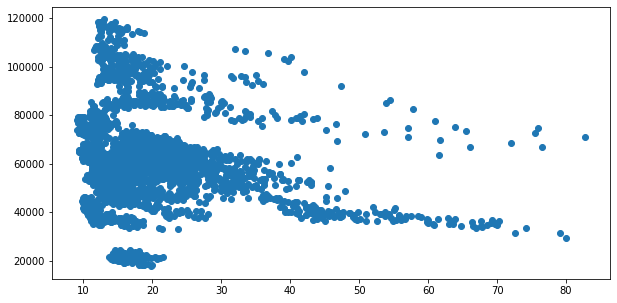

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
matplotlib.pyplot.scatter(df5["Close_VIX"],df5["Close_IBOV"])

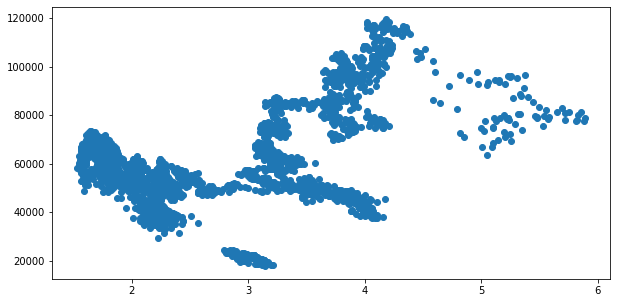

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
matplotlib.pyplot.scatter(df5["Close_DOL"],df5["Close_IBOV"])